# **Heart Failure Prediction App (Machine Learning Project)**

The objective of this project is to predict the risk of a death event in heart failure patients using clinical features and machine learning models.
This is a binary classification problem where:
- 0 --> indicates no death event
- 1 --> indicates death event


## **Importing Required Libraries**

In this cell, we import all the necessary Python libraries required for:
- Data manipulation (pandas, numpy)
- Data visualization
- Machine learning models
- Model evaluation


In [6]:
# importing pandas library for read the csv file
import pandas as pd

## **Loading the Dataset**

Here, we load the Heart Failure clinical records dataset into a pandas DataFrame
to perform analysis and model training.

In [8]:
df = pd.read_csv("/content/heart_failure_clinical_records_dataset.csv")

## **Basic Data Exploration**

This cell is used to:
- View the first few rows of the dataset
- Understand the structure of the data
- Identify feature names and target variable

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [10]:
df.shape

(299, 13)

In [11]:
df.isnull().any()

,0
age,False
anaemia,False
creatinine_phosphokinase,False
diabetes,False
ejection_fraction,False
high_blood_pressure,False
platelets,False
serum_creatinine,False
serum_sodium,False
sex,False


In [66]:
df.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,1.997172,0,20,1,2.601763,0.724990,130,1,0,4,1
1,55.0,0,2.299560,0,38,0,2.601302,0.554998,136,1,0,6,1
2,65.0,0,1.790164,0,20,0,2.564592,0.605904,129,1,1,7,1
3,50.0,1,1.743706,0,20,0,2.584365,0.724990,137,1,0,7,1
4,65.0,1,1.805236,1,20,0,2.617229,0.836526,116,0,0,8,1


**Age**: Higher age increases the risk of death due to reduced cardiac strength and comorbidities.

**Anaemia**: Anaemia increases cardiac workload and slightly raises mortality risk.

**Creatinine Phosphokinase**: Elevated CPK indicates muscle damage but has limited direct impact on death prediction.

**Diabetes**: Diabetes worsens cardiovascular health and moderately increases death risk.

**Ejection Fraction**: Lower ejection fraction strongly indicates poor heart function and high mortality risk.

**High Blood Pressure**: Chronic high blood pressure increases heart strain and mortality risk.

**Platelets**: Abnormal platelet levels reflect health imbalance but show weak direct mortality impact.

**Serum Creatinine**: Higher serum creatinine indicates kidney dysfunction and strongly correlates with death.

**Serum Sodium**: Low serum sodium levels are associated with severe heart failure and higher mortality.

**Sex**: Gender has minimal standalone impact on heart-failure-related mortality.

**Smoking**: Smoking damages cardiovascular health and slightly increases death risk.

**Time**: Shorter follow-up time is the strongest indicator of early death events.

## **Target Variable Analysis**

The target variable in this dataset is `DEATH_EVENT`.
It is a binary variable where:
- 0 = Patient survived
- 1 = Patient died


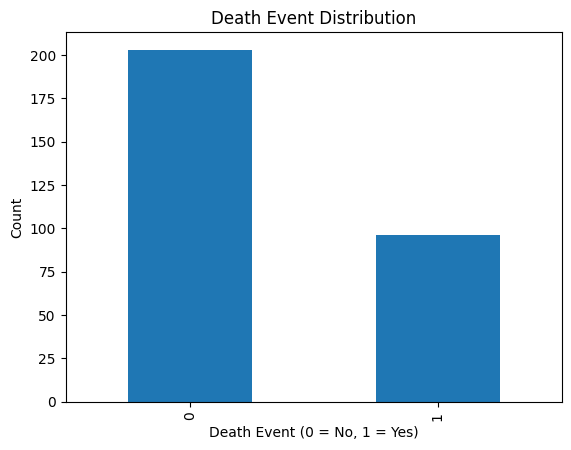

In [60]:
import matplotlib.pyplot as plt

df['DEATH_EVENT'].value_counts().plot(
    kind='bar',
    title='Death Event Distribution'
)
plt.xlabel('Death Event (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


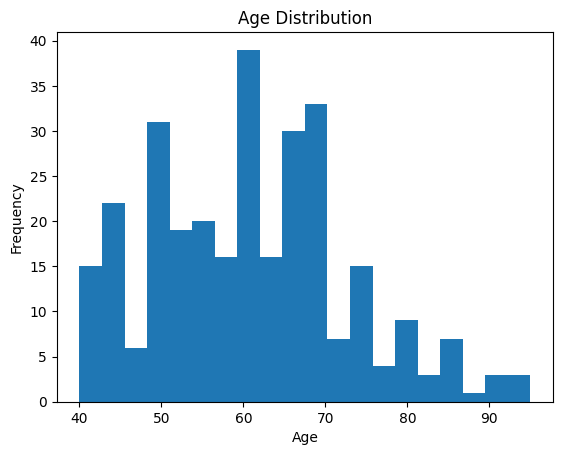

In [61]:
plt.hist(df['age'], bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


## **Checking for Missing Values**

In this step, we check whether the dataset contains any missing or null values
that need to be handled before model training.


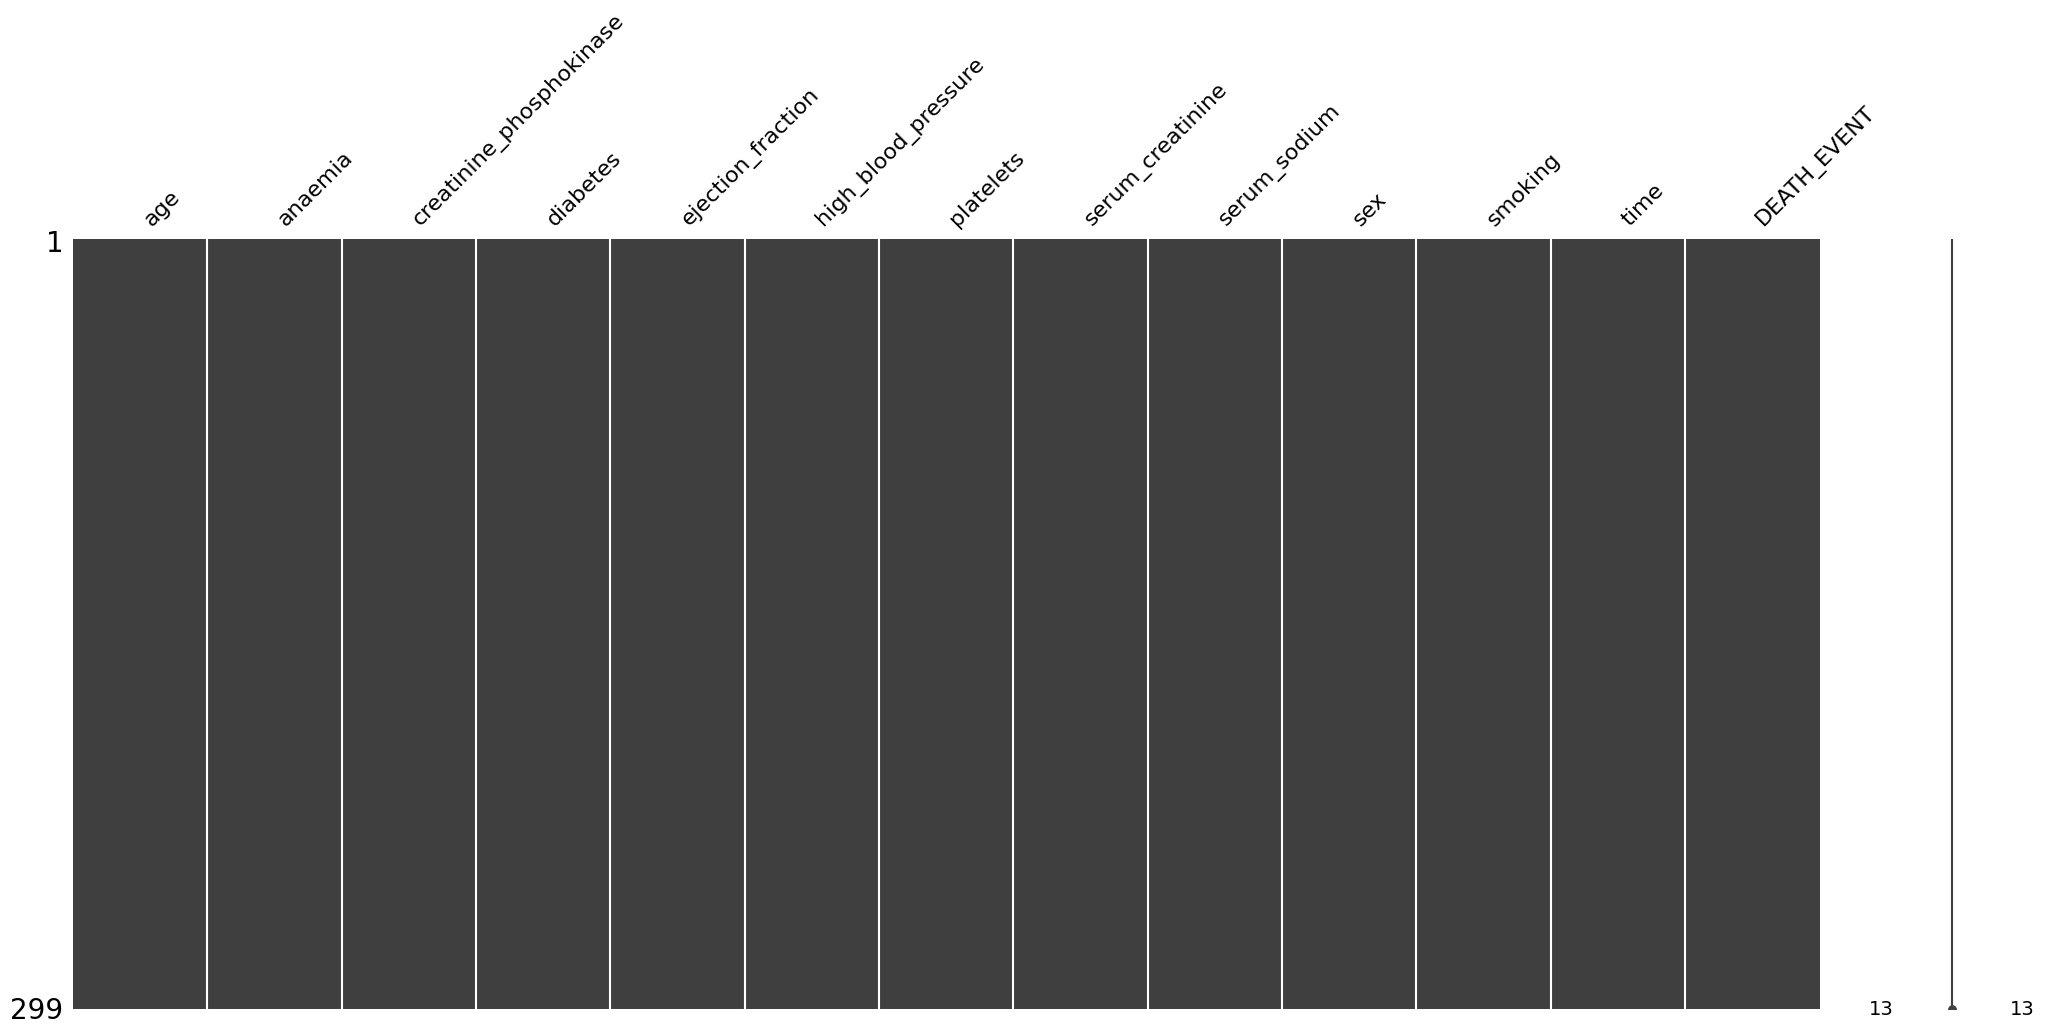

In [13]:
# I want to visualize the missing values in the dataset
import missingno as msno
import matplotlib.pyplot as plt

# Visualize missing values as a matrix
msno.matrix(df)
plt.show()

In [30]:
df.duplicated().sum()

np.int64(0)

In [31]:
# Value counts and unique
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    float64
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 30.5 KB


In [32]:
num_col = df.select_dtypes(include = ['int64','float64']).columns

In [33]:
for i in num_col:
    print('Value counts:\n', df[i].value_counts())
    print('--------------------------------------------------------------------------')
    print('Unique counts:\n', df[i].unique())
    print('\n')
    #print('nunique',df[i].nunique())

Value counts:
 age
60.000    33
50.000    27
65.000    26
70.000    25
45.000    19
55.000    17
75.000    11
58.000    10
53.000    10
63.000     8
80.000     7
72.000     7
42.000     7
40.000     7
85.000     6
68.000     5
62.000     5
52.000     5
61.000     4
49.000     4
73.000     4
51.000     4
59.000     4
69.000     3
46.000     3
82.000     3
90.000     3
64.000     3
48.000     2
78.000     2
95.000     2
57.000     2
54.000     2
77.000     2
67.000     2
66.000     2
44.000     2
60.667     2
87.000     1
79.000     1
41.000     1
94.000     1
86.000     1
81.000     1
43.000     1
47.000     1
56.000     1
Name: count, dtype: int64
--------------------------------------------------------------------------
Unique counts:
 [75.    55.    65.    50.    90.    60.    80.    62.    45.    49.
 82.    87.    70.    48.    68.    53.    95.    58.    94.    85.
 69.    72.    51.    57.    42.    41.    67.    79.    59.    44.
 63.    86.    66.    43.    46.    61.    81.   

<Axes: >

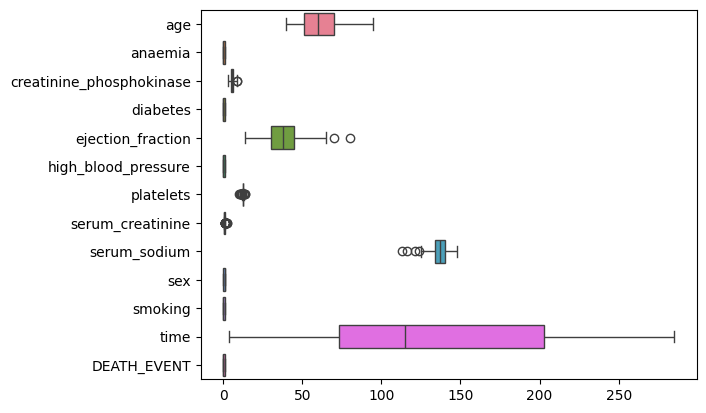

In [34]:
# Outliers in the dataset
import seaborn as sns
sns.boxplot(df,orient="h")

🔴 **creatinine_phosphokinase**

Extremely right-skewed

Many high-value outliers

Expected in medical data

Represents enzyme levels that spike in cardiac injury

🔴 **platelets**

Several high-end outliers

Long right tail

These two features stretch the x-axis, compressing others.

## **Outliers in medical datasets are often meaningful, not errors.**

For example:

**High creatinine phosphokinase** → severe cardiac damage

**Extreme platelet counts** → serious blood conditions

🚫 Blindly removing them can reduce model performance

In [35]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,6.368187,0,20,1,12.487489,1.064711,130,1,0,4,1
1,55.0,0,8.969796,0,38,0,12.481274,0.741937,136,1,0,6,1
2,65.0,0,4.990433,0,20,0,11.995358,0.832909,129,1,1,7,1
3,50.0,1,4.718499,0,20,0,12.254868,1.064711,137,1,0,7,1
4,65.0,1,5.081404,1,20,0,12.697719,1.308333,116,0,0,8,1


## **Feature Categorization**

Features are divided into:
- **Numerical features** (age, creatinine, platelets, etc.)
- **Binary features** (anaemia, diabetes, smoking, sex, etc.)


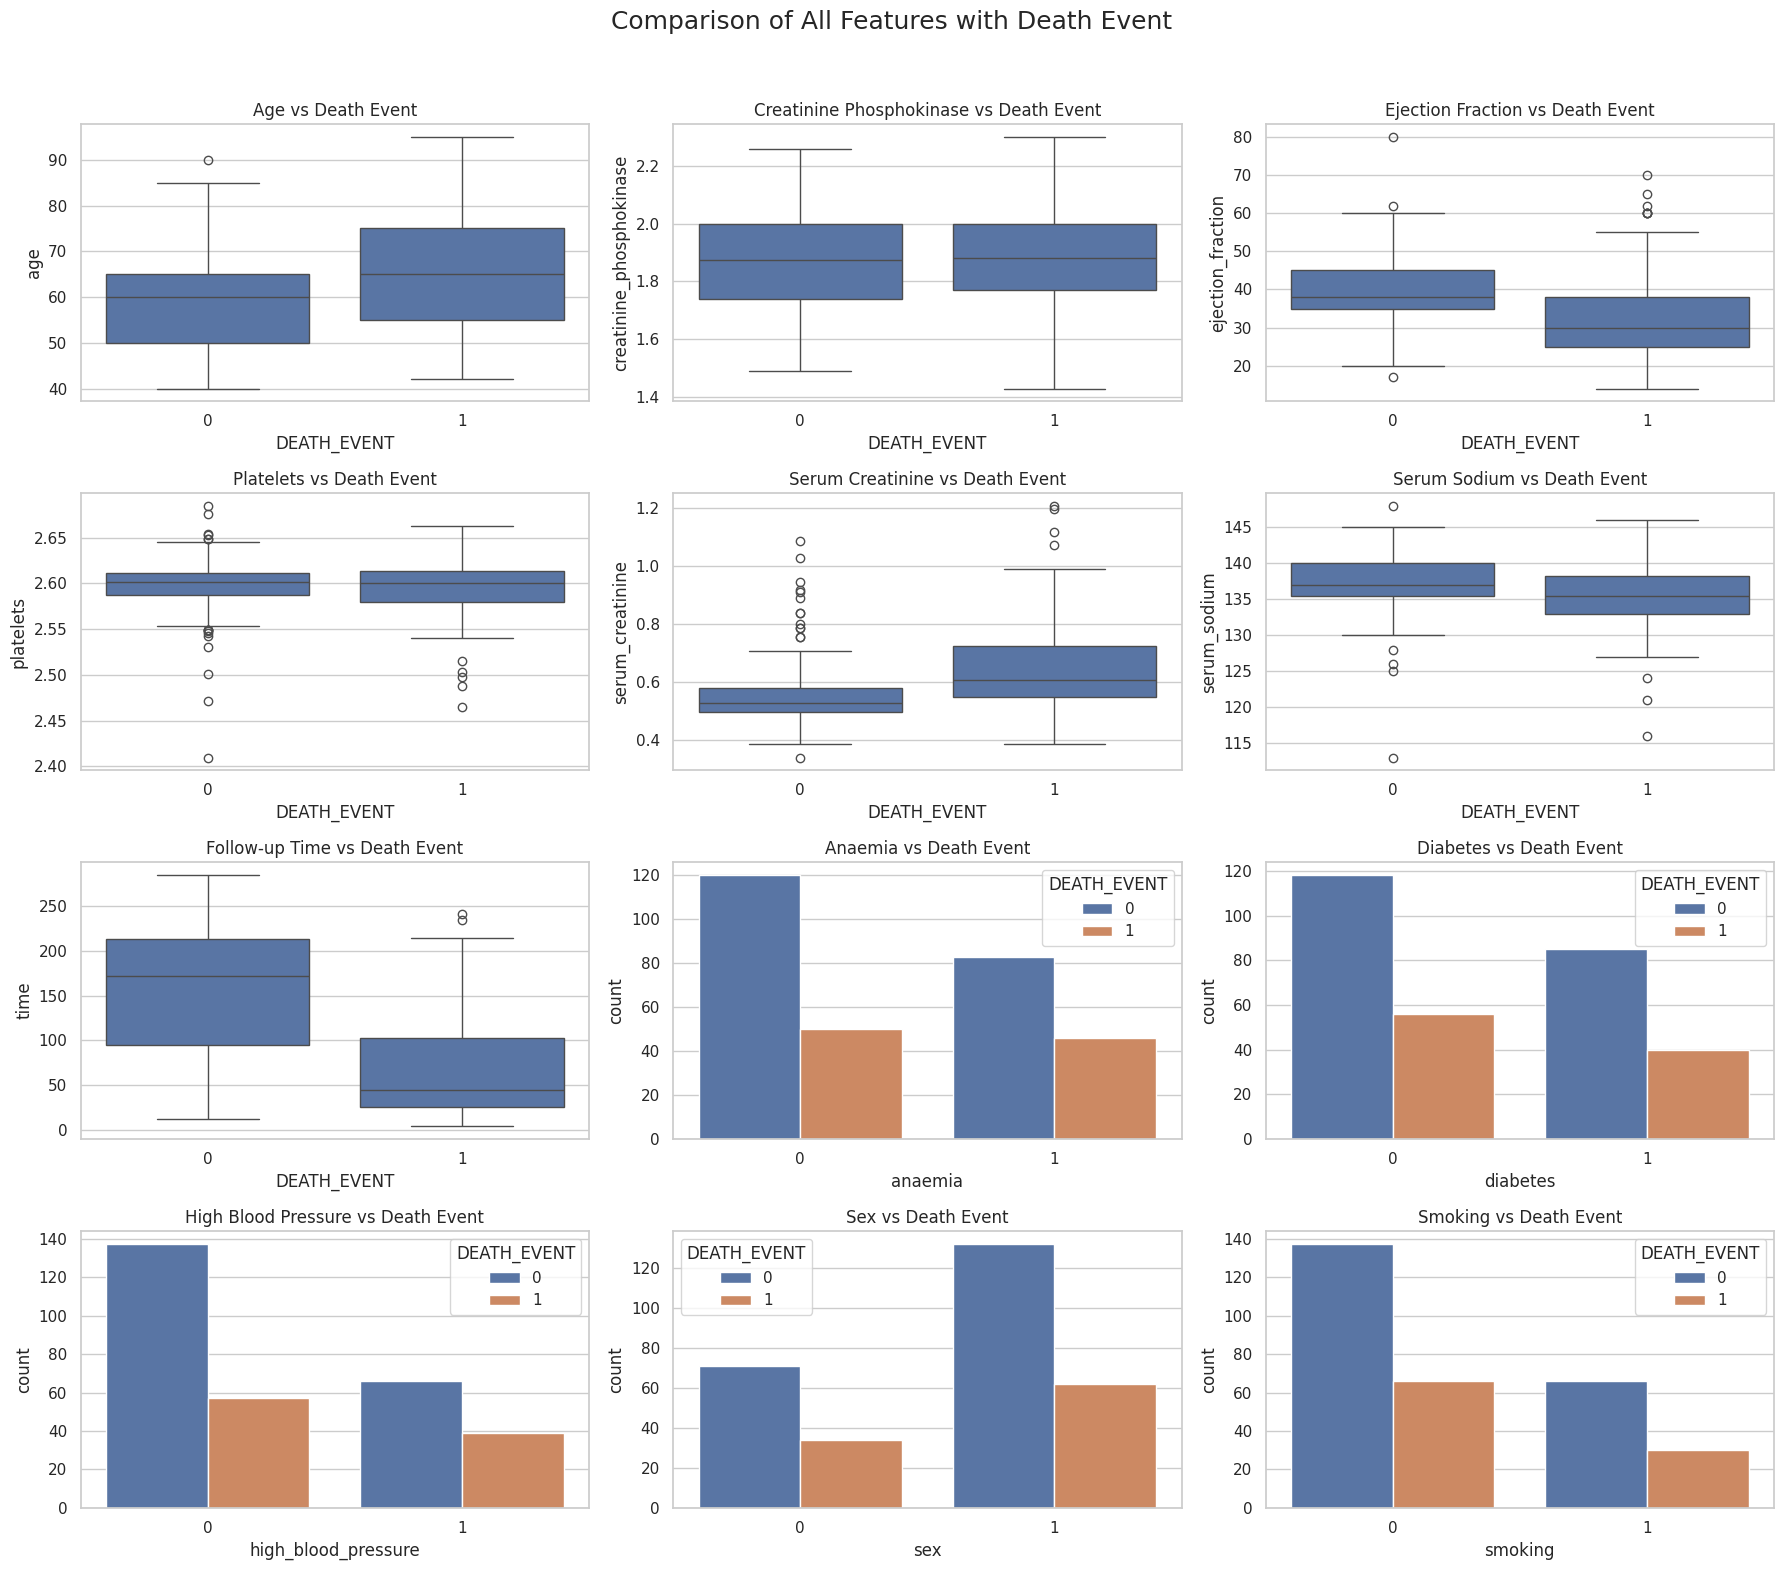

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

fig, axes = plt.subplots(4, 3, figsize=(18, 16))
fig.suptitle("Comparison of All Features with Death Event", fontsize=18)

# Numerical features (Boxplots)
sns.boxplot(x='DEATH_EVENT', y='age', data=df, ax=axes[0, 0])
axes[0, 0].set_title("Age vs Death Event")

sns.boxplot(x='DEATH_EVENT', y='creatinine_phosphokinase', data=df, ax=axes[0, 1])
axes[0, 1].set_title("Creatinine Phosphokinase vs Death Event")

sns.boxplot(x='DEATH_EVENT', y='ejection_fraction', data=df, ax=axes[0, 2])
axes[0, 2].set_title("Ejection Fraction vs Death Event")

sns.boxplot(x='DEATH_EVENT', y='platelets', data=df, ax=axes[1, 0])
axes[1, 0].set_title("Platelets vs Death Event")

sns.boxplot(x='DEATH_EVENT', y='serum_creatinine', data=df, ax=axes[1, 1])
axes[1, 1].set_title("Serum Creatinine vs Death Event")

sns.boxplot(x='DEATH_EVENT', y='serum_sodium', data=df, ax=axes[1, 2])
axes[1, 2].set_title("Serum Sodium vs Death Event")

sns.boxplot(x='DEATH_EVENT', y='time', data=df, ax=axes[2, 0])
axes[2, 0].set_title("Follow-up Time vs Death Event")

# Binary features (Countplots)
sns.countplot(x='anaemia', hue='DEATH_EVENT', data=df, ax=axes[2, 1])
axes[2, 1].set_title("Anaemia vs Death Event")

sns.countplot(x='diabetes', hue='DEATH_EVENT', data=df, ax=axes[2, 2])
axes[2, 2].set_title("Diabetes vs Death Event")

sns.countplot(x='high_blood_pressure', hue='DEATH_EVENT', data=df, ax=axes[3, 0])
axes[3, 0].set_title("High Blood Pressure vs Death Event")

sns.countplot(x='sex', hue='DEATH_EVENT', data=df, ax=axes[3, 1])
axes[3, 1].set_title("Sex vs Death Event")

sns.countplot(x='smoking', hue='DEATH_EVENT', data=df, ax=axes[3, 2])
axes[3, 2].set_title("Smoking vs Death Event")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


“This visualization compares every clinical feature against the death event.
Numerical features are analyzed using boxplots, while binary features are compared using count plots. We observe that age, ejection fraction, serum creatinine, and follow-up time show strong influence on mortality.”

In [36]:
import numpy as np
from sklearn.preprocessing import StandardScaler

In [37]:
# Log transform skewed features
skewed_cols = ['creatinine_phosphokinase', 'platelets', 'serum_creatinine']
for col in skewed_cols:
    df[col] = np.log1p(df[col])

In [38]:
# Features and target
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

In [39]:
# Scale numerical columns
num_cols = ['age','creatinine_phosphokinase','ejection_fraction',
            'platelets','serum_creatinine','serum_sodium','time']

In [40]:
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

In [41]:
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,1.192945,0,0.681084,0,-1.530560,1,0.203074,0.983580,-1.504036,1,0,-1.629502
1,-0.491279,0,2.482877,0,-0.007077,0,0.187977,-0.246714,-0.141976,1,0,-1.603691
2,0.350833,0,-0.552382,0,-1.530560,0,-1.014360,0.121715,-1.731046,1,1,-1.590785
3,-0.912335,1,-0.829199,0,-1.530560,0,-0.366749,0.983580,0.085034,1,0,-1.590785
4,0.350833,1,-0.462575,1,-1.530560,0,0.709655,1.790802,-4.682176,0,0,-1.577879


In [42]:
X.shape

(299, 12)

In [43]:
y.head()

,DEATH_EVENT
0,1
1,1
2,1
3,1
4,1


In [44]:
y.shape

(299,)

## **Train-Test Split**

The dataset is split into training and testing sets
to evaluate the model's performance on unseen data.


In [45]:
# 6. Train–Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [46]:
print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)
print("\nClass distribution in target:")
print(y.value_counts())

Training shape: (239, 12)
Testing shape: (60, 12)

Class distribution in target:
DEATH_EVENT
0    203
1     96
Name: count, dtype: int64


In [47]:
# 1. Import Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd


# 2. Define Models
models = {
    "Logistic Regression": LogisticRegression(
        max_iter=1000, class_weight='balanced', random_state=42
    ),
    "Decision Tree": DecisionTreeClassifier(
        class_weight='balanced', random_state=42
    ),
    "Random Forest": RandomForestClassifier(
        n_estimators=200, class_weight='balanced', random_state=42
    ),
    "XGBoost": XGBClassifier(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=4,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric='logloss',
        random_state=42
    ),
    "SVM": SVC(
        probability=True, class_weight='balanced', random_state=42
    ),
    "KNN": KNeighborsClassifier(
        n_neighbors=7
    )
}


# 3. Train & Evaluate
results = []

for name, model in models.items():
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_prob)
    })


# 4. Results Table
results_df = pd.DataFrame(results).sort_values(by="Recall", ascending=False)
print(results_df)


                 Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC
1        Decision Tree  0.766667   0.619048  0.684211  0.650000  0.744544
4                  SVM  0.750000   0.600000  0.631579  0.615385  0.883184
0  Logistic Regression  0.783333   0.687500  0.578947  0.628571  0.863928
2        Random Forest  0.833333   0.846154  0.578947  0.687500  0.902439
3              XGBoost  0.833333   0.846154  0.578947  0.687500  0.863928
5                  KNN  0.800000   0.888889  0.421053  0.571429  0.836970


# **Model Comparison**

I evaluated multiple classification models using Accuracy, Precision, Recall, F1-Score, and ROC-AUC.

**Decision Tree** gives good interpretability but moderate overall performance.

**Logistic Regression** provides a strong baseline with balanced metrics and good generalization.

**Support Vector Machine (SVM)** performs well in accuracy but is slightly weaker in recall.

**Random Forest** shows strong performance across all metrics due to ensemble learning.

**XGBoost** achieves high accuracy and balanced precision–recall, making it a reliable model.

**KNN** has high accuracy but may not generalize well for unseen data.




**In Medical Data:**

❌ Accuracy is not enough

✅ Recall is the most important
→ Missing a death case is dangerous

✅ ROC-AUC shows overall model strength

**⚠️ Medical Context Rule**

For death prediction:

Recall is the most important metric

Missing a death case (false negative) is dangerous

**Therefore:**

Model with highest Recall is preferred

In [48]:
# Hyperparameter Tuning
# 1.1 Tune Decision Tree (Recall-focused)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier(
    class_weight='balanced',
    random_state=42
)

dt_params = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}

dt_grid = GridSearchCV(
    dt,
    dt_params,
    scoring='recall',
    cv=5,
    n_jobs=-1
)

dt_grid.fit(X_train, y_train)

best_dt = dt_grid.best_estimator_

print("Best Decision Tree Parameters:")
print(dt_grid.best_params_)


Best Decision Tree Parameters:
{'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [49]:
#1.2 Tune XGBoost (Balanced performance)
from xgboost import XGBClassifier

xgb = XGBClassifier(
    eval_metric='logloss',
    random_state=42
)

xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_grid = GridSearchCV(
    xgb,
    xgb_params,
    scoring='recall',
    cv=5,
    n_jobs=-1
)

xgb_grid.fit(X_train, y_train)

best_xgb = xgb_grid.best_estimator_

print("Best XGBoost Parameters:")
print(xgb_grid.best_params_)


Best XGBoost Parameters:
{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print(f"\n{name}")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, pos_label=1))
    print("Recall   :", recall_score(y_test, y_pred, pos_label=1))
    print("F1 Score :", f1_score(y_test, y_pred, pos_label=1))
    print("ROC-AUC  :", roc_auc_score(y_test, y_prob))



Decision Tree (Tuned)
Accuracy : 0.8666666666666667
Precision: 0.8666666666666667
Recall   : 0.6842105263157895
F1 Score : 0.7647058823529411
ROC-AUC  : 0.8427471116816431

XGBoost (Tuned)
Accuracy : 0.8333333333333334
Precision: 0.8461538461538461
Recall   : 0.5789473684210527
F1 Score : 0.6875
ROC-AUC  : 0.8318356867779204


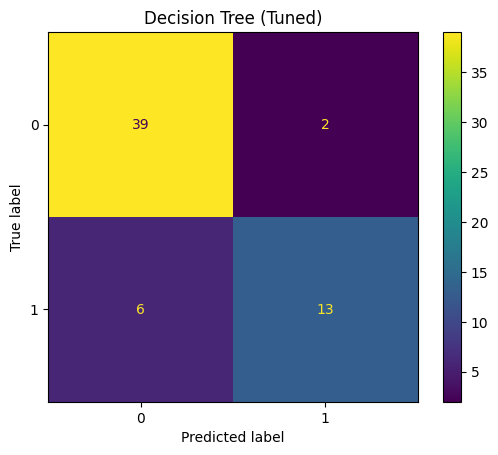

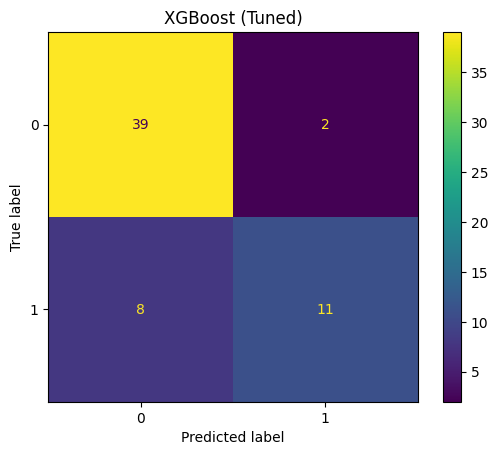

In [50]:
#Confusion matrices
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

models = {
    "Decision Tree (Tuned)": best_dt,
    "XGBoost (Tuned)": best_xgb
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(name)
    plt.show()


## **✅ Why I Chose the Tuned Decision Tree (Based on Confusion Matrix)**

- In medical prediction problems, correctly identifying death events (positive class) is more critical than overall accuracy.

- The tuned **Decision Tree correctly identifies more true positive cases (13)** compared to **XGBoost (11)**.

- The Decision Tree produces **fewer false negatives (6)** than XGBoost **(8)**, meaning it misses fewer high-risk patients.

- Reducing false negatives is crucial in healthcare, as **missing a high-risk patient can have serious consequences**.

- Both models show similar performance for correctly identifying survival cases (true negatives = 39).

- Since the **Decision Tree provides better recall** for the death class, it is **safer and more suitable for clinical decision support**.

- Additionally, the Decision Tree is **more interpretable**, allowing clinicians to understand and trust the model’s decisions.



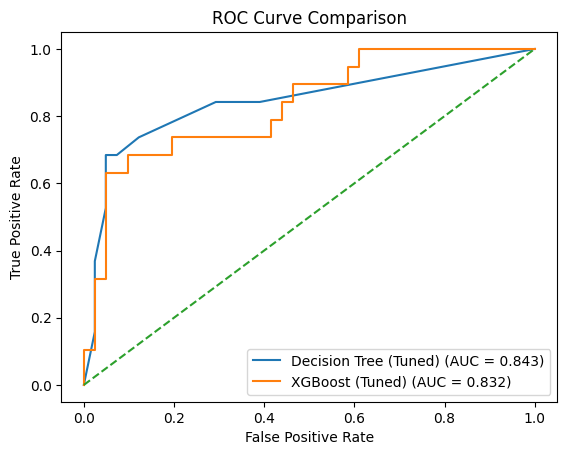

In [51]:
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure()

for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)

    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.3f})")

plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

#### **“I chose the tuned Decision Tree because it has a higher ROC-AUC and fewer false negatives, making it better at identifying high-risk patients, which is most important in medical prediction.”**

In [53]:
df.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,1.997172,0,20,1,2.601763,0.724990,130,1,0,4,1
1,55.0,0,2.299560,0,38,0,2.601302,0.554998,136,1,0,6,1
2,65.0,0,1.790164,0,20,0,2.564592,0.605904,129,1,1,7,1
3,50.0,1,1.743706,0,20,0,2.584365,0.724990,137,1,0,7,1
4,65.0,1,1.805236,1,20,0,2.617229,0.836526,116,0,0,8,1


In [54]:
# Feature groups
num_features = [
    'age',
    'creatinine_phosphokinase',
    'ejection_fraction',
    'platelets',
    'serum_creatinine',
    'serum_sodium',
    'time'
]

binary_features = [
    'anaemia',
    'diabetes',
    'high_blood_pressure',
    'sex',
    'smoking'
]


## **Machine Learning Pipeline**

The full pipeline includes:
- Preprocessing steps
- Decision Tree Classifier

This pipeline ensures end-to-end automation of data processing and prediction.


In [55]:
# Preprocessing pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, FunctionTransformer
import numpy as np

# Log transform function
# log_transformer = FunctionTransformer(np.log1p, validate=True)

#log_transformer = FunctionTransformer(
    #lambda x: np.log1p(np.clip(x, a_min=0, a_max=None)),
    #validate=True)

# SAFE LOG FUNCTION (NO LAMBDA)
def safe_log_transform(x):
    return np.log1p(np.clip(x, a_min=0, a_max=None))

log_transformer = FunctionTransformer(
    safe_log_transform,
    validate=True)



# Numerical pipeline
num_pipeline = Pipeline(steps=[
    ('log', log_transformer),
    ('scaler', StandardScaler())
])

# Column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_features),
        ('bin', 'passthrough', binary_features)
    ]
)

# Decision tree pipeline
from sklearn.tree import DecisionTreeClassifier

dt_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', DecisionTreeClassifier(
        class_weight='balanced',
        max_depth=5,
        min_samples_leaf=5,
        random_state=42
    ))
])

# Train
dt_pipeline.fit(X_train, y_train)

# Predict
y_pred_dt = dt_pipeline.predict(X_test)
y_prob_dt = dt_pipeline.predict_proba(X_test)[:, 1]

## **Prediction Example**

A sample input is passed to the model to predict:
- Death event (0 or 1)
- Probability of death


In [56]:
import pandas as pd

new_patient = pd.DataFrame([{
    'age': 20,
    'anaemia': 1,
    'creatinine_phosphokinase': 25,
    'diabetes': 0,
    'ejection_fraction': 30,
    'high_blood_pressure': 1,
    'platelets': 260000,
    'serum_creatinine': 1.8,
    'serum_sodium': 134,
    'sex': 1,
    'smoking': 1,
    'time': 120
}])


In [58]:
new_patient = pd.DataFrame([{
    'age': 45,
    'anaemia': 0,
    'creatinine_phosphokinase': 120,
    'diabetes': 0,
    'ejection_fraction': 60,
    'high_blood_pressure': 0,
    'platelets': 250000,
    'serum_creatinine': 0.1,
    'serum_sodium': 100,
    'sex': 0,
    'smoking': 0,
    'time': 150
}])


In [59]:
# Class prediction (0 or 1)
dt_prediction = dt_pipeline.predict(new_patient)

# Probability prediction
dt_probability = dt_pipeline.predict_proba(new_patient)[:, 1]

print("Decision Tree Prediction:", dt_prediction[0])
print("Probability of Death:", dt_probability[0])


Decision Tree Prediction: 0
Probability of Death: 0.0


In [36]:
import sklearn
print(sklearn.__version__)


1.3.2


## **Saving the Model**

The trained pipeline is saved using joblib.
This allows us to reuse the model later without retraining.


In [37]:
import joblib
joblib.dump(dt_pipeline, "dt_pipeline.pkl")


['dt_pipeline.pkl']

In [38]:
from google.colab import files
files.download("dt_pipeline.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Conclusion**

This project demonstrates:
- End-to-end ML pipeline creation
- Proper preprocessing and model training
- Deployment using Streamlit and Hugging Face
